In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('../data/heart.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
# Dataset info
print("Dataset Information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


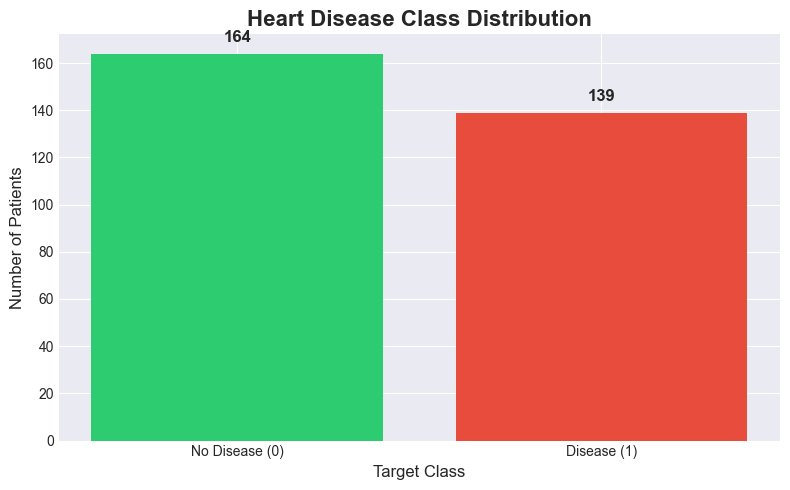

In [4]:
# Target distribution (Class Balance)
plt.figure(figsize=(8, 5))
target_counts = df['target'].value_counts()
plt.bar(['No Disease (0)', 'Disease (1)'], target_counts.values, color=['#2ecc71', '#e74c3c'])
plt.title('Heart Disease Class Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Target Class', fontsize=12)
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

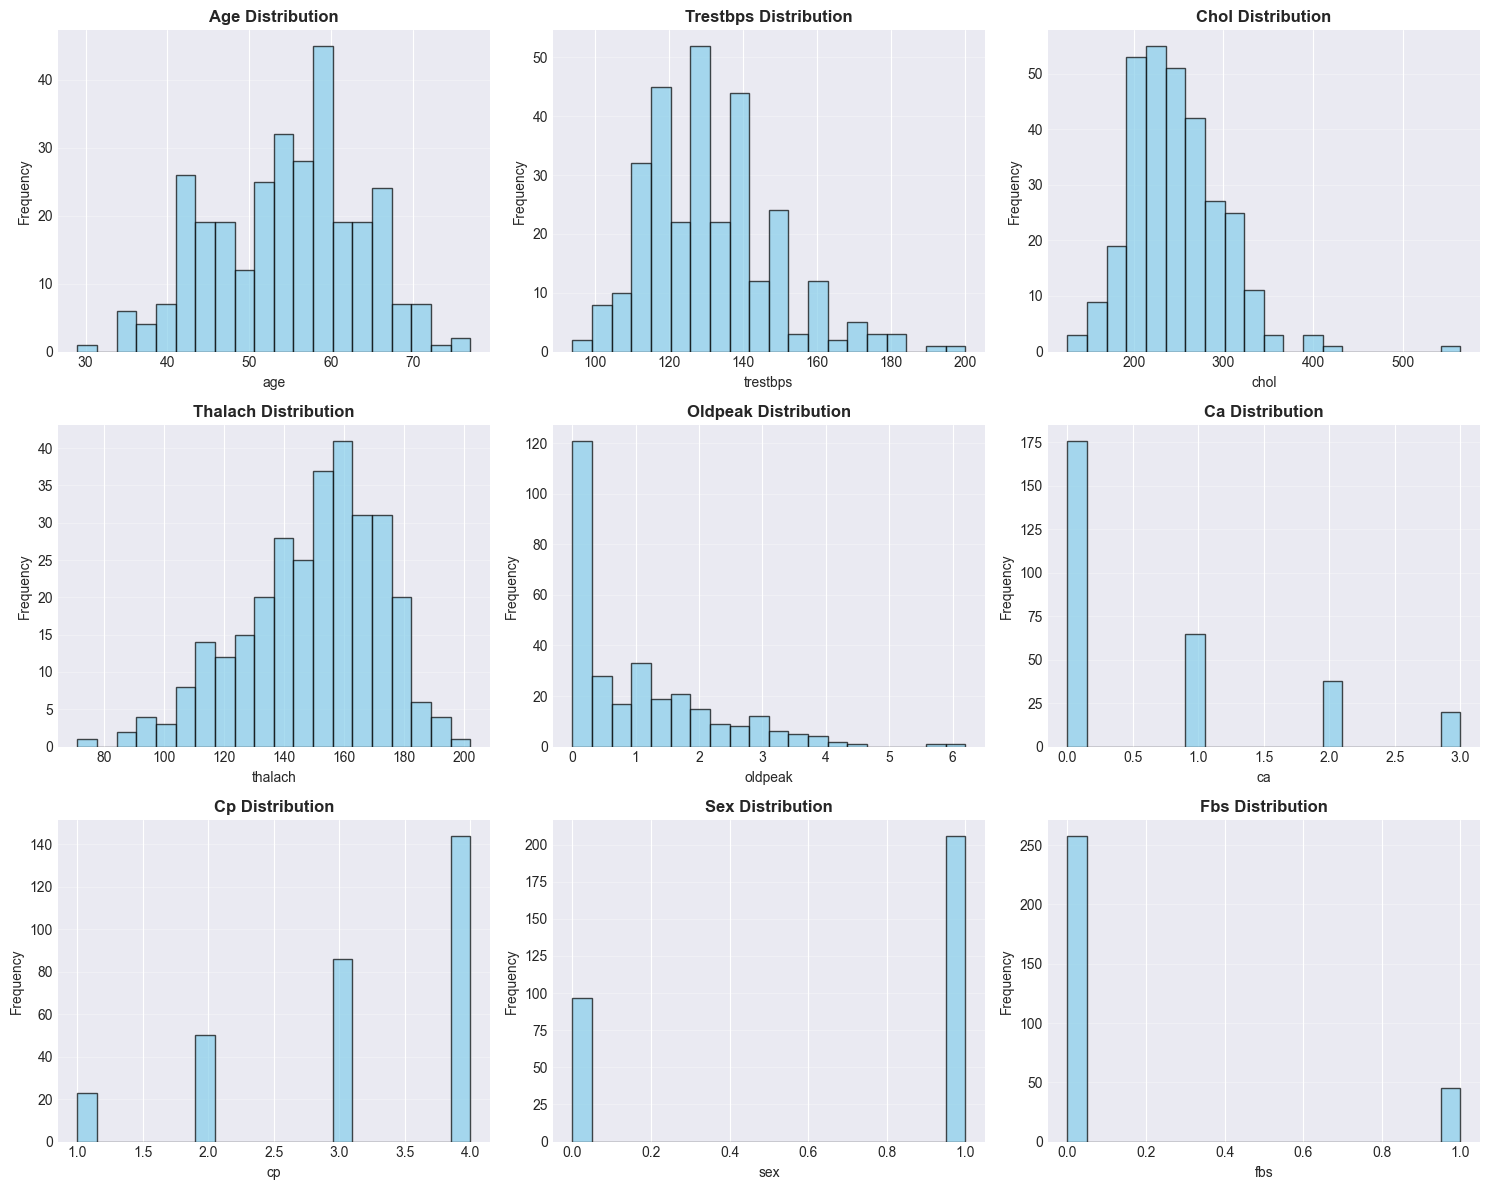

In [5]:
# Feature distributions (Histograms)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp', 'sex', 'fbs']

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{feature.capitalize()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

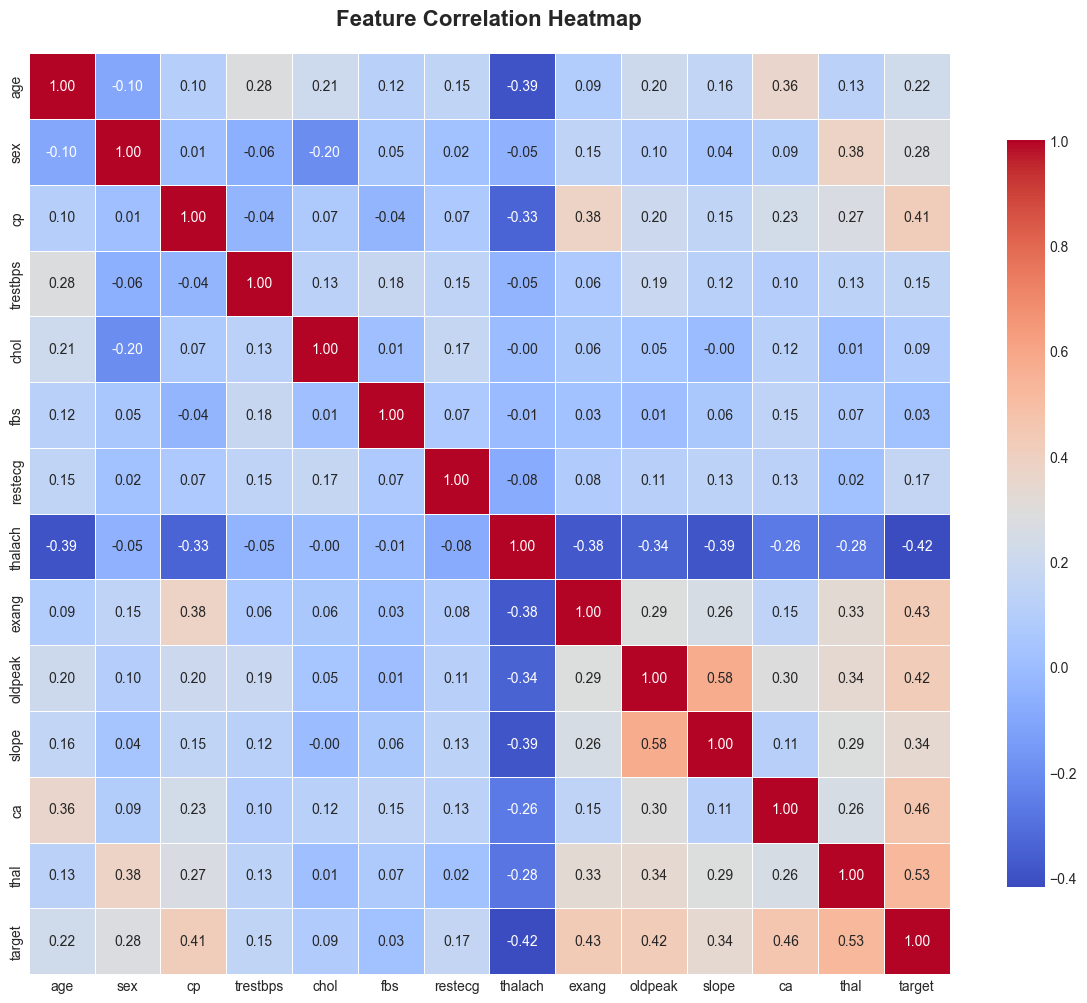

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Key insights
print("=" * 60)
print("KEY EDA INSIGHTS")
print("=" * 60)
print(f"1. Total samples: {len(df)}")
print(f"2. Features: {df.shape[1] - 1} (plus 1 target)")
print(f"3. Class distribution:")
print(f"   - No disease: {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"   - Disease: {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")
print(f"4. Missing values: {df.isnull().sum().sum()}")
print(f"5. Top correlated features with target:")
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)[1:6]
for feat, corr in target_corr.items():
    print(f"   - {feat}: {corr:.3f}")
print("=" * 60)

KEY EDA INSIGHTS
1. Total samples: 303
2. Features: 13 (plus 1 target)
3. Class distribution:
   - No disease: 164 (54.1%)
   - Disease: 139 (45.9%)
4. Missing values: 6
5. Top correlated features with target:
   - thal: 0.526
   - ca: 0.460
   - exang: 0.432
   - oldpeak: 0.425
   - thalach: 0.417
